<a href="https://colab.research.google.com/github/jacmantooth/groupproject/blob/main/group_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First we told Write a function for computing true error and relative error.
then Wrote a function for computing approximate error and approximate relative error.

In [1]:
def true_error(trueVal, measuredVal):
  return trueVal - measuredVal


def relative_error(trueVal, measuredVal):
  trueError = trueVal - measuredVal
  return trueError/ measuredVal


def approximate_error(previousMeasured, currentMeasured):
  return currentMeasured - previousMeasured

def approximate_relative_error(previousMeasured, currentMeasured):
  approximateError = currentMeasured - previousMeasured
  return approximateError/currentMeasured
  

we were then told to use Taylor Series to compute an estimate of a non-polynomial function. we selected $Cos(x)$ centered at $\frac {\pi}{4}$


$$
f_n(x) = \sum_{i= 0}^n\frac{\frac{d}{dx}\cos x|_{x = \frac \pi 4}}{n!} \left(x-\frac\pi4\right)^n
$$


Thus

$$
f_n(x) = \sum_{i=0}^n  \frac{\left(-1\right)^{ \frac{n(n+1)}{2}\rfloor} }{\sqrt 2\cdot n!}
\left(x-\frac \pi 4\right)^n
$$

the following code is the taylor series turned into code. basically what i was make it simple and build it up. so instead of messing with a mess long equation i turned it into a simple equation and built it up.

In [2]:
import math

pi = math.pi
sqrt2 = math.sqrt(2)

def generalTaylorCoefficient(degree):
  return (-1)**(math.floor(degree*(degree+1)/2))/(sqrt2*math.factorial(degree))

def taylorPolynomialTerm(degree, input):
  return generalTaylorCoefficient(degree)*(input-pi/4)**degree

def taylorPolynomial(degree, input):
  sum = 0
  for i in range(0, degree+1):
    sum = sum +  taylorPolynomialTerm(i, input)
  return sum 


using python code to calculate the approximation of Cos at $\frac {\pi}{4}$ we were able to produce two graphs. the first graph is when  we Consider our function at f (center + 0.1). we made a table with the vertical being the degree of the expansion and the horizontal containing the actual value, our approximation, and the errors. the table tells us that we our Degree is small there is a big error but when we increase the degree the error becomes small.  we were told to Discuss the necessity of going to the 20th degree. what we found was that there was a more  appropriate place to cut off the computation. we found that after 9 the computer can longer handle the number and does not show them anymore.

In [3]:
degree = [i for i in range(0,21)]
actualValues = [math.cos(pi/4+.1) for i in degree]
estimateValues = [taylorPolynomial(n,pi/4+.1) for n in degree]
absError = [true_error(estimateValues[i],actualValues[i]) for i in degree]
relError = [relative_error(estimateValues[i],actualValues[i]) for i in degree]
apxError = [approximate_error(estimateValues[i],estimateValues[i+1]) for i in range(0,19)]
relApxError = [approximate_relative_error(estimateValues[i],estimateValues[i+1]) for i in range (0,19)]

In [4]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
                header=dict(values=['Degree', 'Actual Value', 'Estimated Value','Absolute Error','Relative Error','Approximate Error','Relative Approximate Error']),
                 cells=dict(values = [degree,actualValues,estimateValues,absError,relError,apxError,relApxError]))
                     ])
fig.show()

we were then told to graph our function and our 5th order Taylor series. using python code we were able to produce a graph that is similar to the actually function. 

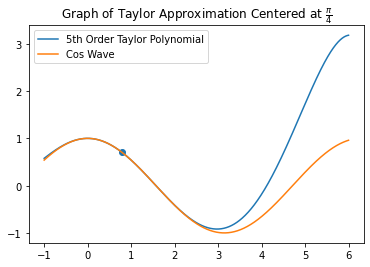

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange( -1,6,.001)
plt.scatter(pi/4,1/sqrt2)
plt.plot(x,taylorPolynomial(5,x))
plt.plot(x, np.cos(x))
plt.title('Graph of Taylor Approximation Centered at ' r'$\frac{\pi}{4}$')
plt.legend(['5th Order Taylor Polynomial', 'Cos Wave'])

plt.show()

As you can see the graph starts to diverge at a certain point. were would we start to dismiss the approximation graphed? as a group we thought it would be best to dismiss the approximation at 3.